In [14]:
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
%matplotlib inline

Calculating best minimal value for power law fit
C:\Users\ibiyt\Anaconda3\lib\site-packages\powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


degree gamma: 3.497220762322735


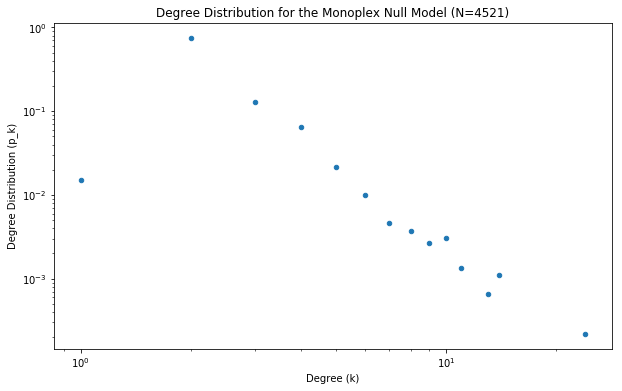

In [17]:
G=nx.read_gpickle('MBTA_eff_best.gpickle')
null=nx.read_gpickle('nullModels/nullModel0.gpickle')
#Develop degree distribution plot and plot on log-log scale
degDistFull=pd.DataFrame(pd.Series(list(dict(null.degree()).values())).value_counts()).reset_index().rename(columns = {'index':'k',0:'p_k'})
degDistFull.p_k=degDistFull.p_k/degDistFull.p_k.sum()
degDistFull.plot(x='k',y='p_k',kind='scatter',loglog=True,figsize=(10,6))
fit = powerlaw.Fit(degDistFull.k)
print('degree gamma: {0}'.format(fit.alpha))
plt.xlabel('Degree (k)')
plt.ylabel('Degree Distribution (p_k)')
plt.title('Degree Distribution for the Monoplex Null Model (N=4521)')
plt.savefig('MBTA_Null_Deg.png')

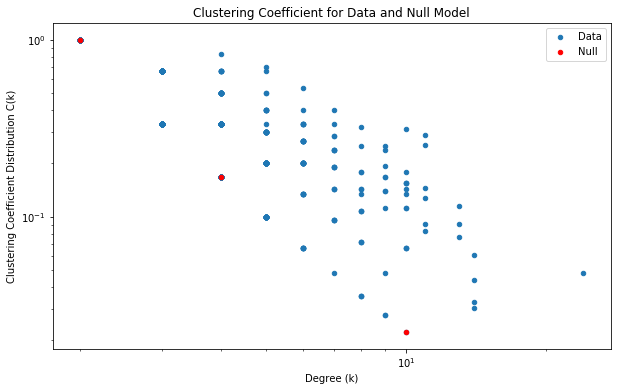

In [32]:
CC=nx.clustering(G)
deg=dict(G.degree())
cKDistFull=pd.DataFrame(pd.Series(deg)).reset_index().rename(columns={'index':'Stop',0:'k'})
df=pd.DataFrame(pd.Series(CC).reset_index()).rename(columns={'index':'Stop',0:'C(k)'})
cKDistFull=cKDistFull.merge(df,how='inner',on='Stop').drop('Stop',axis=1)
ax=cKDistFull.plot(x='k',y='C(k)',kind='scatter',loglog=True,figsize=(10,6),label='Data')

CC=nx.clustering(null)
degN=dict(null.degree())
cKDistNull=pd.DataFrame(pd.Series(degN)).reset_index().rename(columns={'index':'Stop',0:'k'})
dfNull=pd.DataFrame(pd.Series(CC).reset_index()).rename(columns={'index':'Stop',0:'C(k)'})
cKDistNull=cKDistNull.merge(dfNull,how='inner',on='Stop').drop('Stop',axis=1)
cKDistNull.plot(x='k',y='C(k)',kind='scatter',loglog=True,ax=ax,figsize=(10,6),label='Null',color='red')


plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient Distribution C(k)')
plt.title('Clustering Coefficient for Data and Null Model')
plt.legend()
plt.savefig('DataNullCC.png')

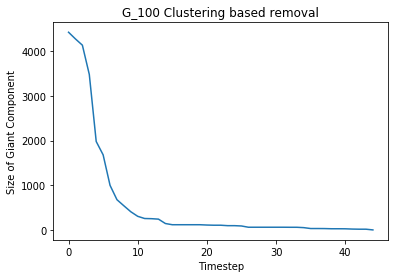

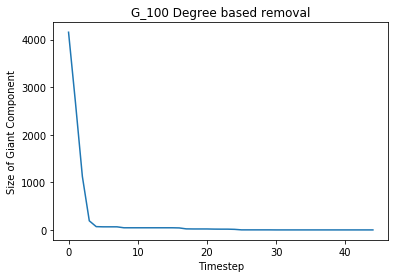

In [40]:
#CLUSTERING 10
plt.close('all')
import operator
def clustering_removal(name,graph, nodes):
    
    plot_array = []
    for i in range (0,nodes):
        clustering_dict = nx.clustering(graph)
        newA = dict(sorted(clustering_dict.items(), key=operator.itemgetter(1), reverse=True)[:100])
        for key in newA:
            graph.remove_node(key) 
        if len(graph.nodes())<10:
            break
        Gc = max(nx.connected_component_subgraphs(graph), key=len)
        plot_array.append(nx.number_of_nodes(Gc))
    
    plt.close('all')
    plt.plot(plot_array)
    plt.title(str(name) +' Clustering based removal')
    plt.ylabel('Size of Giant Component')
    plt.xlabel('Timestep')
    plt.savefig(str(name)+'_clustering.png')
    plt.show()
    return plot_array
    
    
def degree_removal(name,graph,nodes):

    plot_array = []
    for i in range (0,nodes):
        degree_dict = dict(graph.degree())
        newA = dict(sorted(degree_dict.items(), key=operator.itemgetter(1), reverse=True)[:100])
        for key in newA:
            graph.remove_node(key) 
        if len(graph.nodes())<10:
            break
        Gc = max(nx.connected_component_subgraphs(graph), key=len)
        plot_array.append(nx.number_of_nodes(Gc))
    
    plt.close('all')
    plt.plot(plot_array)
    plt.title(str(name) +' Degree based removal')
    plt.ylabel('Size of Giant Component')
    plt.xlabel('Timestep')
    plt.savefig(str(name)+'_degree.png')
    plt.show()
    return plot_array


G_test = nx.read_gpickle('G_100_MBTA_efficiency_increased_Timestamp_20171211_16_09_11.gpickle')
arr = clustering_removal('G_100', G_test,4518)
G_test = nx.read_gpickle('G_100_MBTA_efficiency_increased_Timestamp_20171211_16_09_11.gpickle')
arr = degree_removal('G_100', G_test,4518)

# G_test = nx.read_gpickle('G_50_MBTA_efficiency_increased_Timestamp_20171211_15_20_36.gpickle')
# arr = clustering_removal('G_50', G_test,4518)
# G_test = nx.read_gpickle('G_50_MBTA_efficiency_increased_Timestamp_20171211_15_20_36.gpickle')
# arr = degree_removal('G_50_rand', G_test,4518)

# G_test = nx.read_gpickle('G_10_MBTA_efficiency_increased_Timestamp_20171211_14_48_08.gpickle')
# arr = clustering_removal('G_10_rand', G_test,4518)
# G_test = nx.read_gpickle('G_10_MBTA_efficiency_increased_Timestamp_20171211_14_48_08.gpickle')
# arr = degree_removal('G_10_rand', G_test,4518)

In [42]:
nx.write_edgelist(G,'mbtaedge.txt')